In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from xgboost import XGBRegressor

## 2. Get the Data

In [2]:
car_data = pd.read_csv("USA_cars_datasets.csv")
car_data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
car_data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


## 3. Exploring the Data

In [4]:
car_data.shape

(2499, 13)

In [5]:
car_data.min()

Unnamed: 0                        0
price                             0
brand                         acura
model                          1500
year                           1973
title_status          clean vehicle
mileage                         0.0
color                         beige
vin               19uua96529a004646
lot                       159348797
state                       alabama
country                      canada
condition               1 days left
dtype: object

In [6]:
car_data.info

<bound method DataFrame.info of       Unnamed: 0  price      brand    model  year   title_status   mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1              1   2899       ford       se  2011  clean vehicle  190552.0   
2              2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3              3  25000       ford     door  2014  clean vehicle   64146.0   
4              4  27700  chevrolet     1500  2018  clean vehicle    6654.0   
...          ...    ...        ...      ...   ...            ...       ...   
2494        2494   7800     nissan    versa  2019  clean vehicle   23609.0   
2495        2495   9200     nissan    versa  2018  clean vehicle   34553.0   
2496        2496   9200     nissan    versa  2018  clean vehicle   31594.0   
2497        2497   9200     nissan    versa  2018  clean vehicle   32557.0   
2498        2498   9200     nissan    versa  2018  clean vehicle   31371.0   

       color                  v

In [7]:
car_data.sort_values("price")

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
410,410,0,chevrolet,door,1995,salvage insurance,274706.0,green,2gcec19h8s1195266,167425634,arizona,usa,2 days left
330,330,0,ford,door,1996,salvage insurance,296860.0,green,1falp62w5th144314,167359712,california,usa,19 hours left
331,331,0,ford,door,2006,salvage insurance,203158.0,red,1fmzk04136ga07119,167610991,illinois,usa,17 hours left
339,339,0,ford,door,2002,salvage insurance,214800.0,black,3fafp37372r151014,167360232,south carolina,usa,2 days left
496,496,0,ford,pickup,1996,salvage insurance,252588.0,red,1ftef15n0tlc14455,167357804,oklahoma,usa,17 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1215,65500,ford,srw,2019,clean vehicle,6500.0,black,1ft7w2bt0kec44818,167718954,indiana,usa,21 hours left
277,277,67000,dodge,challenger,2019,clean vehicle,10944.0,blue,2c3cdzl97kh518237,167759490,ohio,usa,21 hours left
1336,1336,70000,ford,drw,2019,clean vehicle,9643.0,no_color,1ft8w3dt3kee48276,167780680,illinois,usa,2 days left
1340,1340,74000,ford,drw,2019,clean vehicle,10536.0,no_color,1ft8w4dt6ked32656,167780682,illinois,usa,2 days left


Probability that FORD car brand has a higher price than the average price for all cars?

In [8]:
print(round(car_data[(car_data['brand']=='ford') & (car_data['price'] > car_data['price'].mean())].shape[0] / car_data[car_data['brand']=='ford'].shape[0] * 100,2),'%')

56.68 %


The most popular color in the cheapest cars?

In [9]:
car_data[car_data['price'] == car_data['price'].min()]['color'].value_counts()

black         6
gray          6
green         6
white         5
red           5
silver        4
blue          4
orange        2
gold          2
maroon        1
yellow        1
light blue    1
Name: color, dtype: int64

## 4. Prepare the Data
Data Cleaning

In [10]:
#Dropping the unnecessary columns and data
drop_columns = ['Unnamed: 0', 'condition', 'vin', 'lot']

In [11]:
car_data = car_data.drop(drop_columns, axis = 1)

In [12]:
car_data.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


In [13]:
car_data.loc[car_data['price'] < 500].head()

,price,brand,model,year,title_status,mileage,color,state,country
141,0,dodge,van,2008,salvage insurance,177948.0,orange,utah,usa
144,0,dodge,door,2014,salvage insurance,123660.0,silver,utah,usa
188,175,chrysler,door,2000,salvage insurance,231240.0,red,north carolina,usa
196,0,ford,mpv,2017,clean vehicle,76858.0,white,texas,usa
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,kentucky,usa


In [14]:
car_data = car_data.drop(car_data.loc[car_data['price'] == car_data['price'].min()].index)

In [15]:
for column in car_data.columns:
    print(ascii(car_data[column][0]))

6300
'toyota'
'cruiser'
2008
'clean vehicle'
274117.0
'black'
'new jersey'
' usa'


In [16]:
car_data['country'] = car_data['country'].apply(lambda x:x.replace(" ", ""))
ascii(car_data['country'][1])

"'usa'"

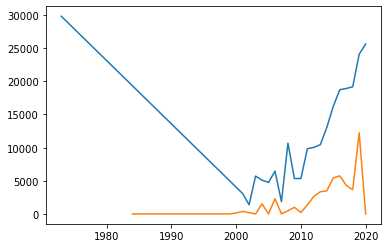

In [17]:
car_data_gb = deepcopy(car_data)
avg_cost = car_data_gb.groupby(by=["title_status", "year"])['price'].mean()
plt.plot(avg_cost['clean vehicle'], label = "clean")
plt.plot(avg_cost['salvage insurance'], label = "damaged")

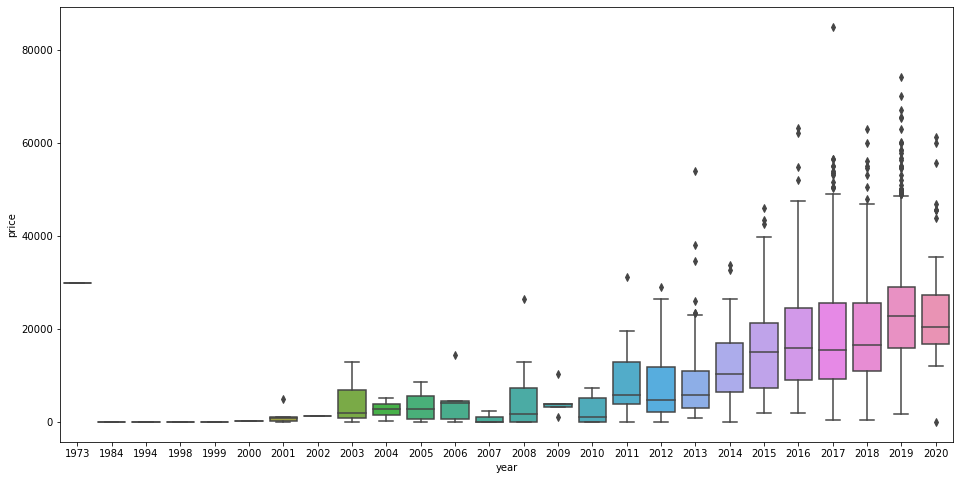

In [18]:
car_data_pnr = car_data[['price', 'year']]
fig, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=car_data['year'], y=car_data['price'])

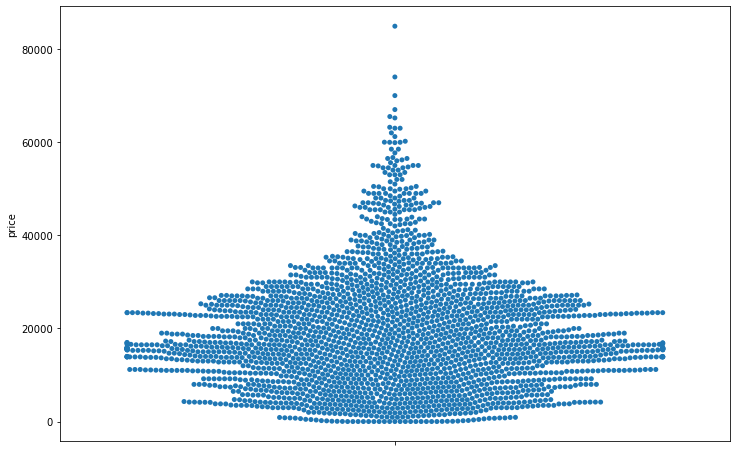

In [19]:
plt.rcParams['figure.figsize']=(12,8)
sns.swarmplot(y=car_data["price"]);

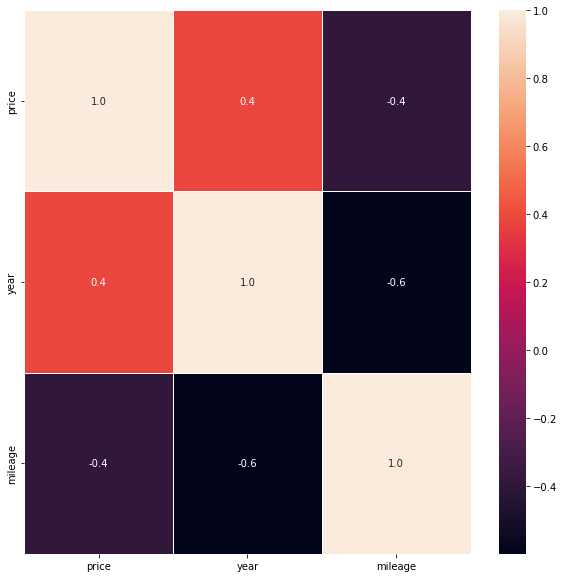

In [20]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(car_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Machine Learning Models and Training

In [21]:
from copy import deepcopy
from sklearn import preprocessing
data_ml = deepcopy(car_data)

X = data_ml.drop(["title_status"], axis = 1)
y = data_ml['title_status']

color_encoder = preprocessing.OrdinalEncoder()
color_encoded = color_encoder.fit(X)
color_encoded = color_encoded.fit_transform(X)
X = color_encoded
X

array([[165.,  27.,  25., ...,   2.,  24.,   1.],
       [ 57.,   8.,  92., ...,  37.,  35.,   1.],
       [138.,   7.,  75., ...,  37.,   7.,   1.],
       ...,
       [233.,  24., 119., ...,  37.,   6.,   1.],
       [233.,  24., 119., ...,   2.,   6.,   1.],
       [233.,  24., 119., ...,  37.,   6.,   1.]])

In [22]:
y = y.apply(lambda x: 0 if x == "clean vehicle" else 1)
y

0       0
1       0
2       0
3       0
4       0
       ..
2494    0
2495    0
2496    0
2497    0
2498    0
Name: title_status, Length: 2456, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)

(1964, 8) (1964,)


In [24]:
log = LogisticRegression()
log.fit(X_train, y_train)

/Users/DELL/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
print(log.score(X_test, y_test))

0.9552845528455285


In [26]:
# To view the coefficients
log.coef_

array([[-1.92862522e-02,  1.60958814e-02, -1.33971562e-02,
        -6.68458100e-02,  5.07010213e-04, -1.85812906e-03,
        -2.06220268e-02,  8.85042844e-01]])

In [27]:
categorical_features=[feature for feature in car_data.columns if car_data[feature].dtype=='O']

numerical_features=[feature for feature in car_data.columns if car_data[feature].dtype!='O']

In [28]:
X=car_data.drop('price',axis=1)
y=car_data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

train_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

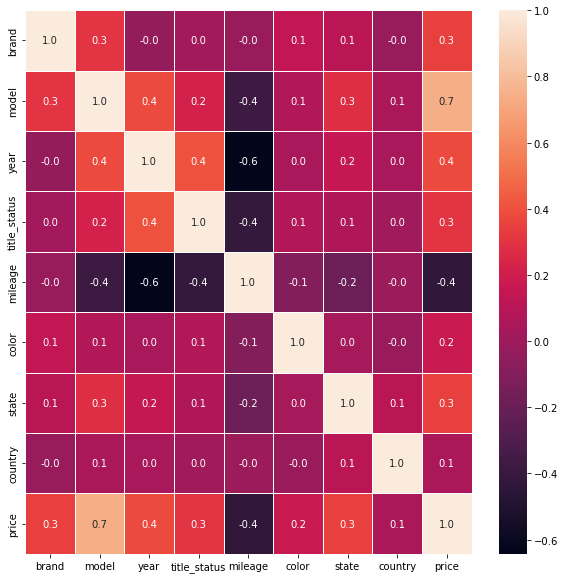

In [29]:
for feature in categorical_features:
    feature_labels=train_set.groupby(feature)['price'].mean().sort_values().index
    feature_labels={k:i for i,k in enumerate(feature_labels,0)}
    train_set[feature]=train_set[feature].map(feature_labels)
    test_set[feature]=test_set[feature].map(feature_labels)

test_set.dropna(inplace=True)

scaler=StandardScaler()

scaled_X_train=pd.DataFrame(scaler.fit_transform(train_set.drop('price',axis=1)), columns=X_train.columns)
scaled_X_train.index=train_set.index
scaled_X_test=pd.DataFrame(scaler.transform(test_set.drop('price',axis=1)), columns=X_test.columns)
scaled_X_test.index=test_set.index
scaled_train=pd.concat([scaled_X_train,train_set['price']],axis=1)
scaled_test=pd.concat([scaled_X_test,test_set['price']],axis=1)
X_train=scaled_train.drop('price',axis=1) 
y_train=scaled_train['price']
X_test=scaled_test.drop('price',axis=1)
y_test=scaled_test['price']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(scaled_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [30]:
def try_model(model):
    model.fit(X_train, y_train)
 
    y_pred = model.predict(X_test)
    pd.DataFrame(y_pred)
    return 'Model Testing Accurancy: ', r2_score(y_test, y_pred)

In [31]:
neigh = KNeighborsRegressor(n_neighbors=6)
try_model(neigh)

('Model Testing Accurancy: ', 0.6057170996784735)

In [32]:
forest = RandomForestRegressor(max_depth=50, random_state=1)
try_model(forest)

('Model Testing Accurancy: ', 0.6379092698912274)

In [33]:
XGB = XGBRegressor(n_estimators=500, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8)
try_model(XGB)

('Model Testing Accurancy: ', 0.6210091099376335)